## Brian Whiteley D208 Task 1

#### Import libraries

In [110]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


#### Read csv

In [111]:
df = pd.read_csv('churn_clean.csv', index_col= 'CaseOrder')

## Data Cleaning

In [112]:
df.rename(columns = {
    'Item1':'TIMELY_RESPONSE',
    'Item2':'TIMELY_FIXES',
    'Item3':'TIMELY_REPLACEMENTS',
    'Item4':'RELIABILITY',
    'Item5':'OPTIONS',
    'Item6':'RESPECTFUL_RESPONSE',
    'Item7':'COURTEOUS_EXCHANGE',
    'Item8':'ACTIVE_LISTENING'},
    inplace=True)


#### List columns

In [113]:
df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TIMELY_RESPONSE',
       'TIMELY_FIXES', 'TIMELY_REPLACEMENTS', 'RELIABILITY', 'OPTIONS',
       'RESPECTFUL_RESPONSE', 'COURTEOUS_EXCHANGE', 'ACTIVE_LISTENING'],
      dtype='object')

#### Create new dataframes with relevant columns

In [114]:
df = df[['Children','Age','Income','Techie','Port_modem','Tablet',
             'InternetService','Phone','Multiple','StreamingTV',
             'StreamingMovies','Bandwidth_GB_Year']]

#### Check for nulls

In [115]:
df.isna().sum().sum()

2129

#### Drop null rows

In [116]:
df.dropna(inplace=True)

In [117]:
categorical_columns = df.select_dtypes(include="object").columns
clean_df = pd.get_dummies(df, columns = categorical_columns)


In [118]:
clean_df.describe()

,Children,Age,Income,Bandwidth_GB_Year
count,7871.000000,7871.000000,7871.000000,7871.000000
mean,2.079532,53.037861,39825.423228,3443.172497
std,2.150211,20.607405,28223.978149,2188.092280
min,0.000000,18.000000,348.670000,169.399280
25%,0.000000,35.000000,19286.155000,1285.826834
50%,1.000000,53.000000,33055.590000,3376.351709
75%,3.000000,71.000000,53095.315000,5640.761859
max,10.000000,89.000000,258900.700000,7158.981530


## Data Visualizations

#### Univariate

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

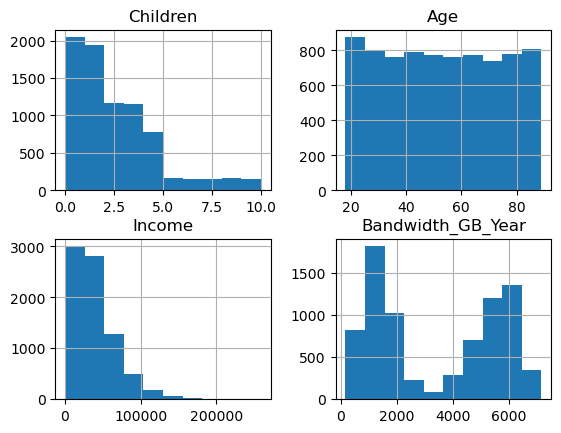

In [119]:
clean_df[['Children','Age','Income','Bandwidth_GB_Year']].hist()


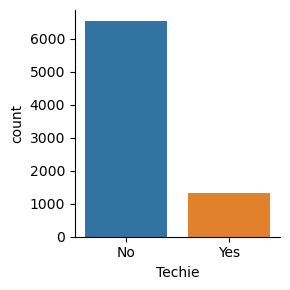

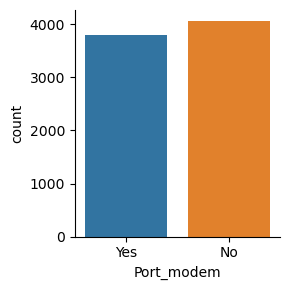

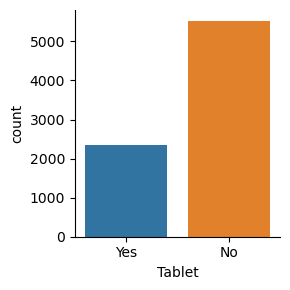

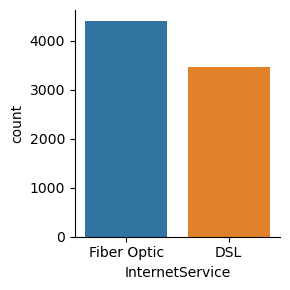

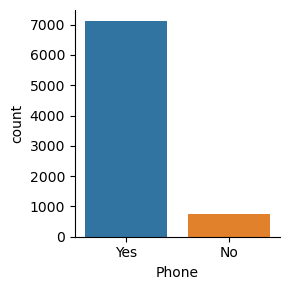

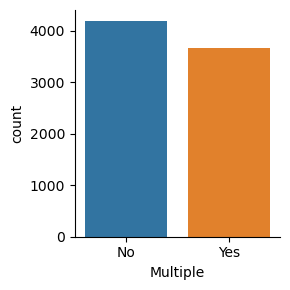

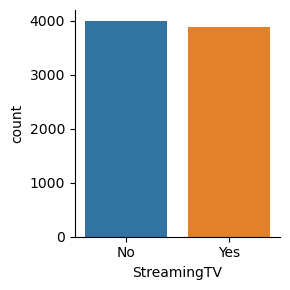

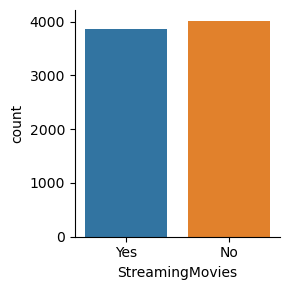

In [124]:
cat_columns = ['Techie','Port_modem','Tablet','InternetService',
               'Phone','Multiple','StreamingTV','StreamingMovies']
for col in cat_columns:
    sns.catplot(x = col,
                kind = 'count',
                data= df,
                height = 3)

#### Bivariate

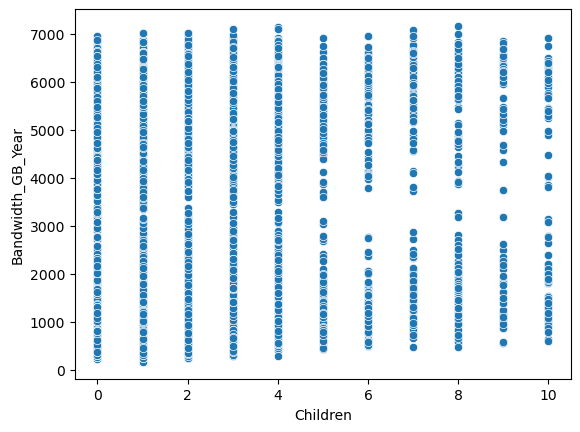

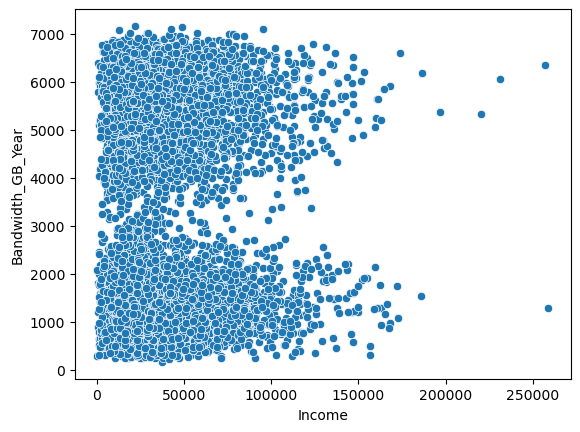

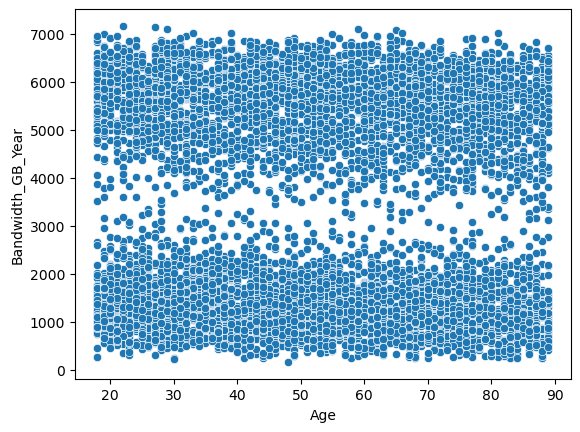

In [108]:
y = df['Bandwidth_GB_Year']
inds = ['Children', 'Income','Age']
for x in inds:
    sns.scatterplot(x = df[x], y = y)
    plt.show()

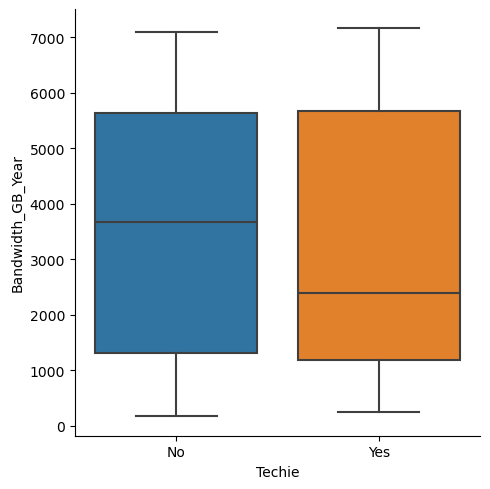

In [125]:

sns.catplot(data = df, x = 'Techie', y = 'Bandwidth_GB_Year', kind = 'box')